In [43]:
# Import necessary packages
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For data visualization
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For scaling features
from sklearn.linear_model import LinearRegression, Ridge, Lasso  # Regression models
from sklearn.metrics import r2_score, mean_squared_error  # For model evaluation

In [44]:
# Load the dataset
df = pd.read_csv("uber.csv")  # Load the Uber fare dataset


In [45]:
 #Check for missing values
df.isnull().sum()  # Identify columns with missing values

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [46]:
# Fill missing numeric values with the mean of each column
df.fillna(df.mean(numeric_only=True), inplace=True)

In [47]:
# Drop unnecessary columns
# 'Unnamed: 0' is an index column, 'key' and 'pickup_datetime' are not useful for prediction
df = df.drop(columns=['Unnamed: 0', 'key', 'pickup_datetime'])


In [48]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1


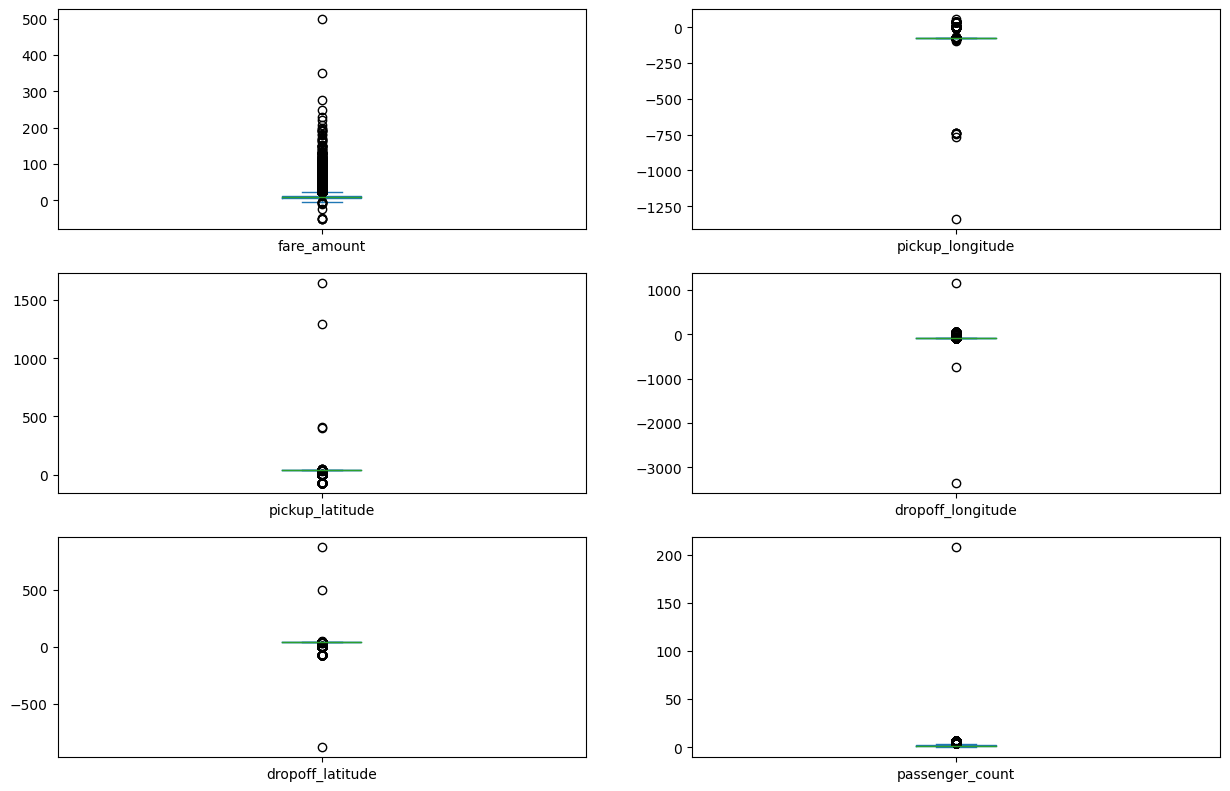

In [49]:
# Using boxplot to visualize outliers
df.plot(kind = "box",subplots = True,layout = (6,2),figsize=(15,20))
plt.show()

In [50]:
# Identify and handle outliers using the InterQuartile Range (IQR)
# Define a function to remove outliers by clipping values to the IQR range
def remove_outlier(df1, col):
    Q1 = df1[col].quantile(0.25)  # 1st Quartile (25th percentile)
    Q3 = df1[col].quantile(0.75)  # 3rd Quartile (75th percentile)
    IQR = Q3 - Q1  # InterQuartile Range
    lower_whisker = Q1 - 1.5 * IQR  # Lower boundary for outliers
    upper_whisker = Q3 + 1.5 * IQR  # Upper boundary for outliers
    # Clip values to the defined boundaries
    df1[col] = np.clip(df1[col], lower_whisker, upper_whisker)
    return df1


In [51]:
# Apply outlier treatment to all numeric columns
for col in df.select_dtypes(include=np.number).columns:
    df = remove_outlier(df, col)

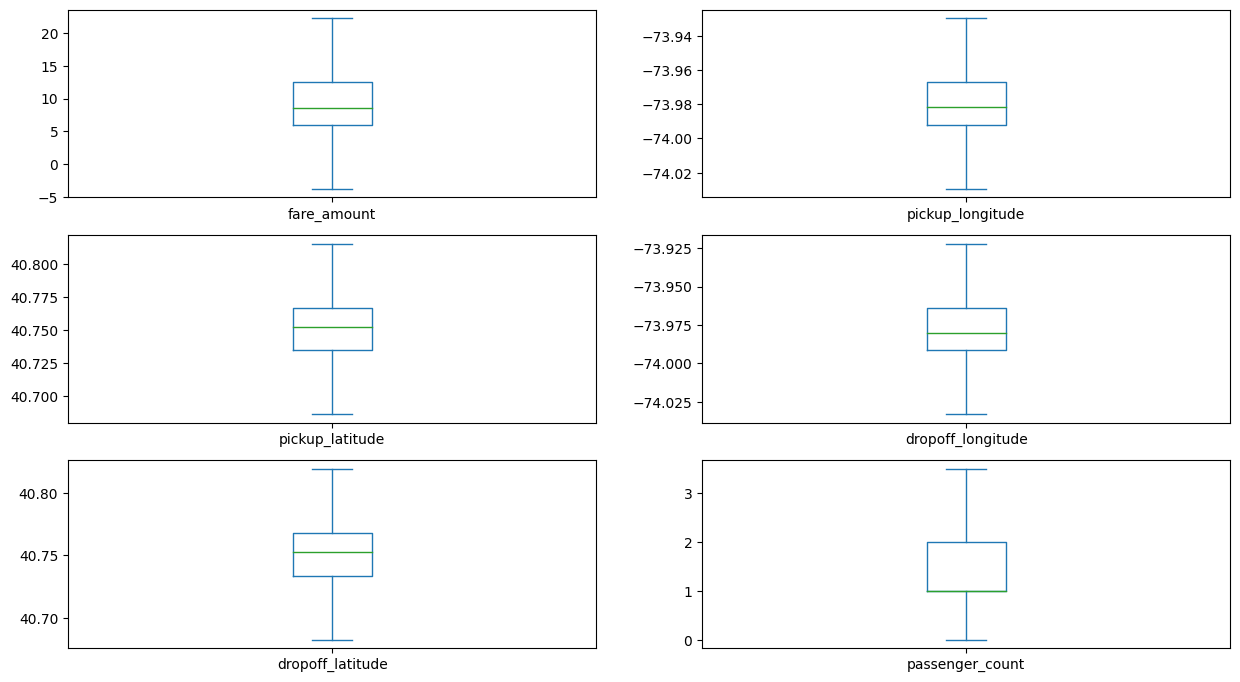

In [52]:
#Boxplot shows that dataset is free from outliers
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20))
plt.show()

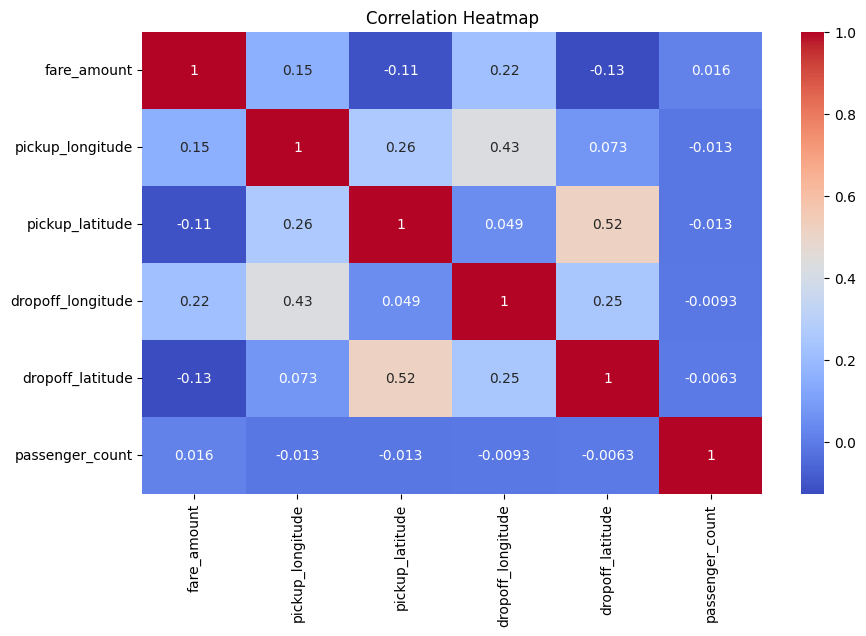

In [53]:
# Check the correlation between features using a heatmap

# sns.heatmap: Creates a heatmap to show correlation between features
# df.corr(): Computes correlation matrix
# annot=True: Displays the correlation values on the heatmap
# cmap='coolwarm': Uses 'coolwarm' color scheme (blue = low correlation, red = high correlation)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')  # Display correlation matrix
plt.title('Correlation Heatmap')
plt.show()

In [54]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['fare_amount'])  # Features excluding 'fare_amount'
y = df['fare_amount']  # Target variable (fare amount)

In [55]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
# Standardize the features (scale them to have mean 0 and variance 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
# Implement Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

In [58]:
# Implement Ridge Regression model (L2 regularization)





# Alpha adds a penalty to the model to prevent overfitting
# Higher alpha = stronger penalty (simpler model), Lower alpha = weaker penalty (more complex model),, Lower alpha = less penalty (fitting data closely)

# Linear Regression: Alpha = 0 (no regularization)
# Ridge: Alpha > 0 (e.g., 0.1, 1.0) for reducing model complexity without eliminating features
# Lasso: Alpha > 0 (e.g., 0.01, 0.1) for reducing feature coefficients to zero (feature selection)

ridge_model = Ridge(alpha=1.0)  # Alpha controls regularization strength
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

In [59]:
# Implement Lasso Regression model (L1 regularization)
lasso_model = Lasso(alpha=0.1)  # Alpha controls regularization strength
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

In [60]:
# Define a function to evaluate models using R2 Score and RMSE
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)  # R2 Score: How well the model predicts the data
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # RMSE: Root Mean Squared Error
    print(f"{model_name} - R2 Score: {r2:.4f}, RMSE: {rmse:.2f}")


In [61]:
# Evaluate Linear Regression model
evaluate_model(y_test, y_pred_lr, "Linear Regression")

Linear Regression - R2 Score: 0.0911, RMSE: 5.20


In [62]:
# Evaluate Ridge Regression model
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")

Ridge Regression - R2 Score: 0.0911, RMSE: 5.20


In [63]:
# Evaluate Lasso Regression model
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

Lasso Regression - R2 Score: 0.0896, RMSE: 5.20
